### Profile of Zero-Vehicle Households in the City of Los Angeles in 2011 
**By Monisha Reginald**<br/><br/>
My group project will be focused on understanding access to grocery stores by non-automobile modes (e.g. walking and public transit) for seniors in the City of Los Angeles. To understand which locations are the most important places to provide access by these modes, this assignment will explore the locations of households that do not have a private vehicle and senior-headed households that do not have a private vehicle in the City of Los Angeles. To understand how these patterns have changed over time, I will be focused on 2011 (and a complementary analysis about zero-vehicle households in 2021 will be completed by another group member).

#### Creating a geodataframe with the appropriate geographies
My group wants to do its analysis on block groups within the City of Los Angeles. There is no geojson file that contains just this information, so I will have to import two separate files:
1) A geojson file that contains spatial information denoting spatial extent of the City of Los Angeles
2) A geojson file that contains block groups for the entire County of Los Angeles
I will then use these two files to create a new file with just the block groups within the City of Los Angeles.

In [1]:
import pandas as pd
import geopandas as gpd

First, I will import a dataset of municipalities in LA County and inspect the data.

In [2]:
municipalities=gpd.read_file('City_Boundaries.geojson')
municipalities.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CITY_NAME,CITY_LABEL,ABBR,OF_AREA_SM,CITY_TYPE,FEAT_TYPE,COLOR_EGIS,URL,PHONE,last_edited_date,ShapeSTArea,ShapeSTLength,geometry
0,3,Redondo Beach,Redondo Beach,RBCH,6.349,City,Breakwater,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-20 00:08:28+00:00,2.483437e+05,7484.640344,"POLYGON ((-118.39951 33.84377, -118.39952 33.8..."
1,4,Long Beach,Long Beach,LB,50.309,City,Water,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-20 00:08:28+00:00,4.000260e+06,20369.924519,"POLYGON ((-118.21061 33.72181, -118.21064 33.7..."
2,5,Redondo Beach,Redondo Beach,RBCH,6.349,City,Breakwater,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-20 00:08:28+00:00,9.452611e+03,701.117043,"POLYGON ((-118.39150 33.83193, -118.39160 33.8..."
3,6,Los Angeles,Los Angeles,LA,468.852,City,Breakwater,"Gray - RGB 178,178,178",www.lacity.org,2134733231,2022-07-20 00:08:28+00:00,2.857692e+05,17391.983014,"POLYGON ((-118.26566 33.70405, -118.26574 33.7..."
4,7,Long Beach,Long Beach,LB,50.309,City,Breakwater,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-20 00:08:28+00:00,1.097324e+05,5448.776853,"POLYGON ((-118.11850 33.74278, -118.11855 33.7..."


I want to create a geojson file with just the LA City boundary.

In [3]:
lacity=municipalities.query("CITY_NAME == 'Los Angeles'").copy()

Now, I will download a dataset of block groups within Los Angeles County and inspect the data.
I have learned (the hard way) that you need to use a geojson file from 2010 to do analysis with census data from 2010. 

In [4]:
countybgs=gpd.read_file('2010_Census_Block_Groups_(Geography_Only).geojson')
countybgs.head()

,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,COMMNAME,ShapeSTArea,ShapeSTLength,geometry
0,1,060372932023,2932023,293202,0.2272,BG 3,44000,44000,Los Angeles,Los Angeles,LA City - Harbor City,6.334870e+06,10809.732641,"POLYGON ((-118.29910 33.81975, -118.29918 33.8..."
1,2,060372941201,2941201,294120,0.3144,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Wilmington,8.764387e+06,12908.543740,"POLYGON ((-118.24598 33.80005, -118.24600 33.8..."
2,3,060372932022,2932022,293202,0.0965,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Harbor City,2.689751e+06,9129.549876,"POLYGON ((-118.29908 33.82230, -118.29930 33.8..."
3,4,060372932021,2932021,293202,0.0827,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Harbor City,2.304498e+06,9332.023680,"POLYGON ((-118.29920 33.82570, -118.29939 33.8..."
4,5,060372941101,2941101,294110,0.1251,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Wilmington,3.487909e+06,9057.642084,"POLYGON ((-118.25846 33.79945, -118.25754 33.8..."


By plotting these two shapefiles, we can verify that they cover different geographies and use different spatial units. The "lacity" file countains the geographic extent that we are interested in, but the "countybgs" file contains that geographies that we're using as our unit as analysis.

<AxesSubplot: >

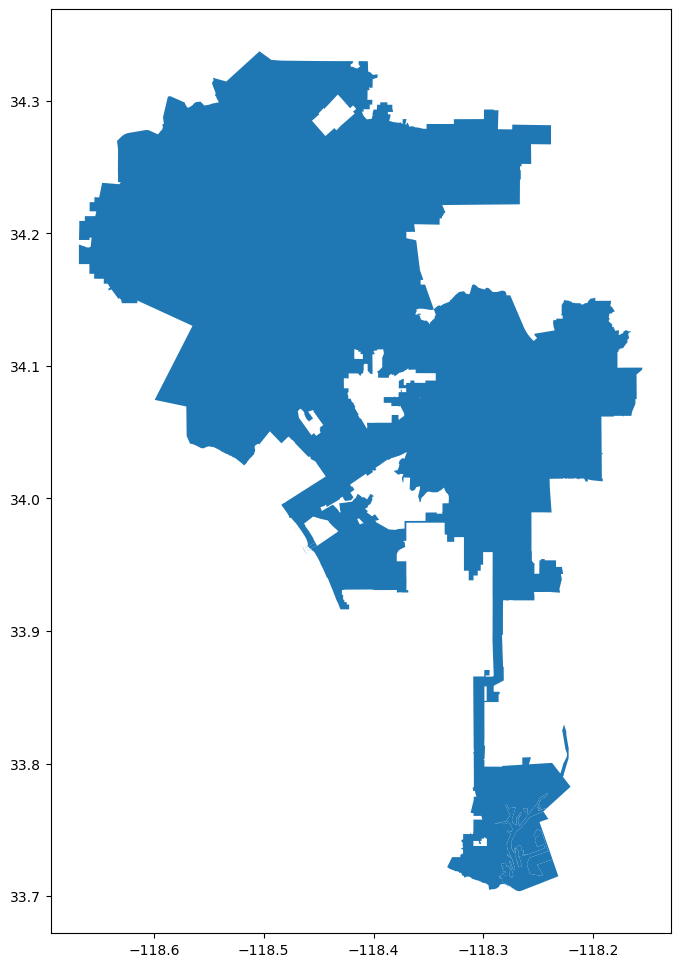

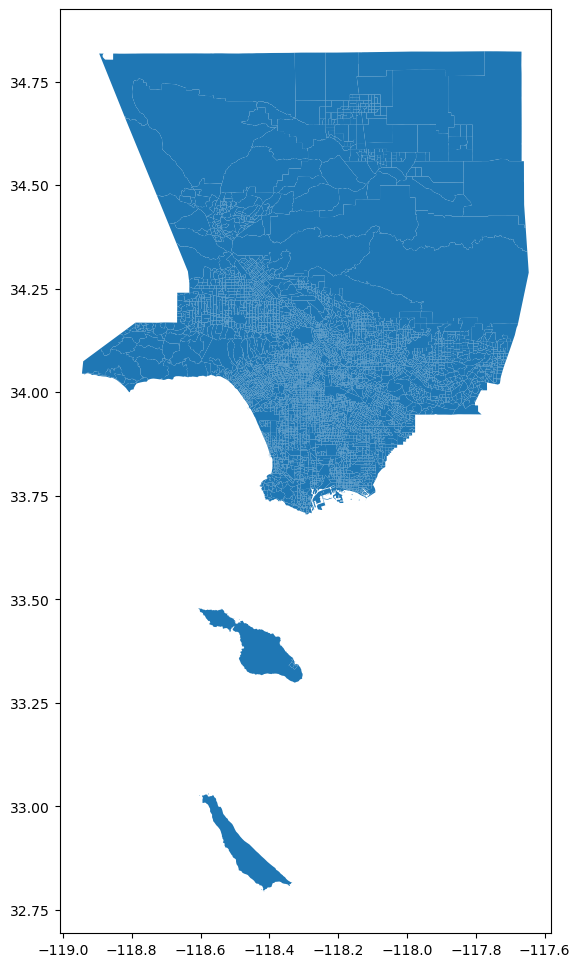

In [5]:
lacity.plot(figsize=(15,12))
countybgs.plot(figsize=(15,12))

To solve this problem, I "clipped" the countyblocks file to the lacity 'mask' following this documentation: https://geopandas.org/en/stable/docs/reference/api/geopandas.clip.html

In [6]:
citybgs = gpd.clip(countybgs, lacity)

/opt/conda/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


Now if we plot the file, we'll see that cityblocks has block group units within just the City of Los Angeles. 

<AxesSubplot: >

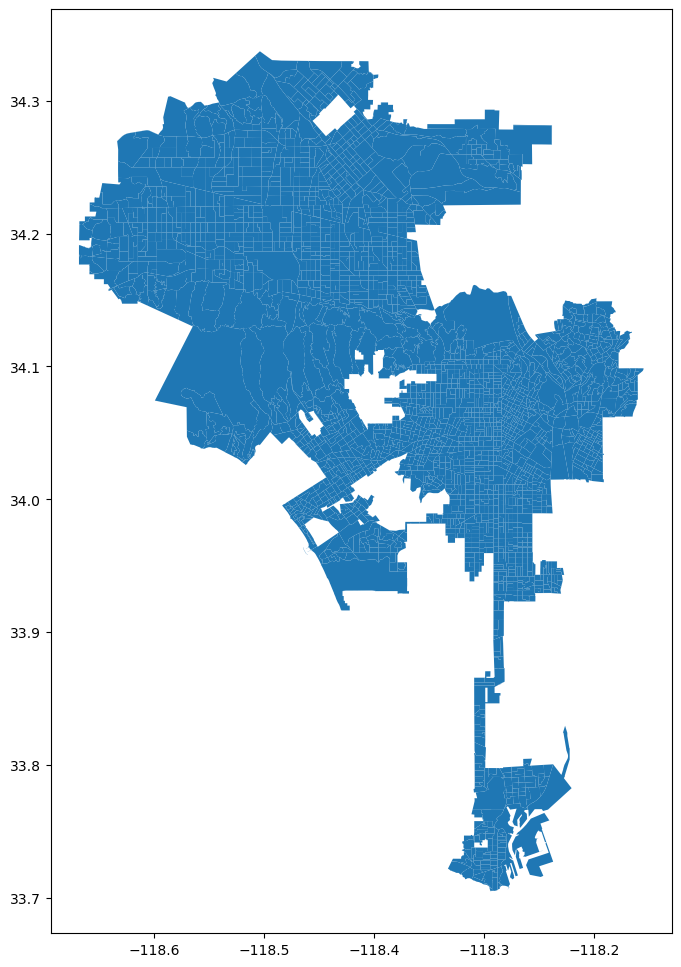

In [7]:
citybgs.plot(figsize=(15,12))

With the following inspection, we can find that there were 2,796 block groups in the City of Los Angeles in 2010. This is important, because we will use this information to "QA" future merges and ensure that no data has been lost.

In [8]:
citybgs.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2796 entries, 1943 to 6306
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2796 non-null   int64   
 1   GEOID10        2796 non-null   object  
 2   CTBG10         2796 non-null   object  
 3   CT10           2796 non-null   object  
 4   AreaSqMil      2796 non-null   float64 
 5   LABEL          2796 non-null   object  
 6   FIP10          2778 non-null   object  
 7   FIP10RV        2796 non-null   object  
 8   CDP_NAME       2778 non-null   object  
 9   CITYNAME       2796 non-null   object  
 10  COMMNAME       2796 non-null   object  
 11  ShapeSTArea    2796 non-null   float64 
 12  ShapeSTLength  2796 non-null   float64 
 13  geometry       2796 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(9)
memory usage: 327.7+ KB


#### Zero-Vehicle Households in Los Angeles
Now we are going to import our Census data from https://www.socialexplorer.com/tables/ACS2011_5yr/R13284518.
An important part of this step is specifying that the block group number (Geo_FIPS) is a string and not a number so that it can be used effectively in merges for analysis.

In [9]:
vehicles=pd.read_csv('R13284518_SL150.csv',    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [10]:
vehicles.head()

,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,...,PCT_ACS11_5yr_B25045010,PCT_ACS11_5yr_B25045011,PCT_ACS11_5yr_B25045012,PCT_ACS11_5yr_B25045013,PCT_ACS11_5yr_B25045014,PCT_ACS11_5yr_B25045015,PCT_ACS11_5yr_B25045016,PCT_ACS11_5yr_B25045017,PCT_ACS11_5yr_B25045018,PCT_ACS11_5yr_B25045019
0,060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...","Block Group 1, Census Tract 1011.10, Los Angel...",CA,150,0,ACSSF,27184,NaN,NaN,...,6.20,47.32,0.85,0.0,0.85,0.00,46.48,7.89,35.63,2.96
1,060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...","Block Group 2, Census Tract 1011.10, Los Angel...",CA,150,0,ACSSF,27185,NaN,NaN,...,11.24,57.99,13.61,0.0,1.18,12.43,44.38,20.91,20.12,3.35
2,060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...","Block Group 3, Census Tract 1011.10, Los Angel...",CA,150,0,ACSSF,27186,NaN,NaN,...,4.92,27.87,0.00,0.0,0.00,0.00,27.87,13.11,7.49,7.26
3,060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...","Block Group 1, Census Tract 1011.22, Los Angel...",CA,150,0,ACSSF,27187,NaN,NaN,...,13.33,16.00,0.00,0.0,0.00,0.00,16.00,0.00,16.00,0.00
4,060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...","Block Group 2, Census Tract 1011.22, Los Angel...",CA,150,0,ACSSF,27188,NaN,NaN,...,24.90,5.93,0.00,0.0,0.00,0.00,5.93,0.00,5.93,0.00


There are a ton of columns, so I'm going to create a new dataset with just the ones that I will need. 

In [11]:
vehicles_clean = vehicles[['Geo_FIPS','Geo_NAME','SE_A10030_001','SE_A10030_002','PCT_SE_A10030_002','ACS11_5yr_B25045006',
    'ACS11_5yr_B25045010', 'ACS11_5yr_B25045015', 'ACS11_5yr_B25045019']].copy()
vehicles_clean

,Geo_FIPS,Geo_NAME,SE_A10030_001,SE_A10030_002,PCT_SE_A10030_002,ACS11_5yr_B25045006,ACS11_5yr_B25045010,ACS11_5yr_B25045015,ACS11_5yr_B25045019
0,060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...",710,6,0.85,0,44,0,21
1,060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...",507,69,13.61,0,57,63,17
2,060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...",427,0,0.00,0,21,0,31
3,060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...",750,7,0.93,0,100,0,0
4,060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...",506,0,0.00,0,126,0,0
...,...,...,...,...,...,...,...,...,...
6420,060379800311,"Block Group 1, Census Tract 9800.31, Los Angel...",45,0,0.00,0,0,0,0
6421,060379800331,"Block Group 1, Census Tract 9800.33, Los Angel...",0,0,NaN,0,0,0,0
6422,060379901000,"Block Group 0, Census Tract 9901, Los Angeles ...",0,0,NaN,0,0,0,0
6423,060379902000,"Block Group 0, Census Tract 9902, Los Angeles ...",0,0,NaN,0,0,0,0


Next I will rename the column names so that they're easier to use.

In [12]:
vehicles_clean.columns = ['FIPS_2010', 'Geography_Name', 'Number_HHs', 'Num_ZeroCarHHs', 'Pct_ZeroCarHHs', 'SeniorOwnerNoCar', 'SeniorOwnerCar', 'SeniorRenterNoCar', 'SeniorRenterCar']
vehicles_clean.head()

,FIPS_2010,Geography_Name,Number_HHs,Num_ZeroCarHHs,Pct_ZeroCarHHs,SeniorOwnerNoCar,SeniorOwnerCar,SeniorRenterNoCar,SeniorRenterCar
0,060371011101,"Block Group 1, Census Tract 1011.10, Los Angel...",710,6,0.85,0,44,0,21
1,060371011102,"Block Group 2, Census Tract 1011.10, Los Angel...",507,69,13.61,0,57,63,17
2,060371011103,"Block Group 3, Census Tract 1011.10, Los Angel...",427,0,0.00,0,21,0,31
3,060371011221,"Block Group 1, Census Tract 1011.22, Los Angel...",750,7,0.93,0,100,0,0
4,060371011222,"Block Group 2, Census Tract 1011.22, Los Angel...",506,0,0.00,0,126,0,0


Now, I will merge this data with the spatial dataset from earlier!

In [13]:
citybgs['FIPS_2010'] = citybgs['GEOID10']
citybgs

,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,COMMNAME,ShapeSTArea,ShapeSTLength,geometry,FIPS_2010
1943,1944,060372742022,2742022,274202,0.2663,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Venice,7.424107e+06,24946.811469,"MULTIPOLYGON (((-118.46685 33.97905, -118.4664...",060372742022
2077,2078,060372742023,2742023,274202,0.0617,BG 3,44000,44000,Los Angeles,Los Angeles,LA City - Venice,1.721313e+06,11509.120629,"POLYGON ((-118.45487 33.96624, -118.45512 33.9...",060372742023
2076,2077,060372742021,2742021,274202,0.1093,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Venice,3.047847e+06,13826.242616,"POLYGON ((-118.45321 33.96705, -118.45328 33.9...",060372742021
2201,2203,060372742024,2742024,274202,0.0429,BG 4,44000,44000,Los Angeles,Los Angeles,LA City - Venice,1.195472e+06,4249.103758,"POLYGON ((-118.46223 33.97778, -118.46226 33.9...",060372742024
2832,2834,060377029013,7029013,702901,0.3349,BG 3,45806,99037,Marina del Rey,Unincorporated,LA County - Del Rey,9.337405e+06,25460.055080,"POLYGON ((-118.46188 33.97848, -118.46190 33.9...",060377029013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764,3766,060371041032,1041032,104103,0.1965,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Lake View Terrace,5.477736e+06,10840.272452,"POLYGON ((-118.38294 34.28409, -118.38342 34.2...",060371041032
6201,6203,060371041031,1041031,104103,0.1699,BG 1,44000,44000,Los Angeles,Los Angeles,LA City - Lake View Terrace,4.737506e+06,9785.719097,"POLYGON ((-118.38884 34.28507, -118.38907 34.2...",060371041031
2387,2389,060371042042,1042042,104204,0.8930,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Lake View Terrace,2.489527e+07,27624.055770,"POLYGON ((-118.39372 34.29698, -118.39365 34.2...",060371042042
2096,2097,060371060202,1060202,106020,0.4106,BG 2,44000,44000,Los Angeles,Los Angeles,LA City - Sylmar,1.144696e+07,16112.143228,"POLYGON ((-118.41715 34.32495, -118.41717 34.3...",060371060202


There are now two equivalent FIPS columns that can be used in a merge.

In [14]:
vehicles_bgs=citybgs.merge(vehicles_clean,on="FIPS_2010")
vehicles_bgs

,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,...,geometry,FIPS_2010,Geography_Name,Number_HHs,Num_ZeroCarHHs,Pct_ZeroCarHHs,SeniorOwnerNoCar,SeniorOwnerCar,SeniorRenterNoCar,SeniorRenterCar
0,1944,060372742022,2742022,274202,0.2663,BG 2,44000,44000,Los Angeles,Los Angeles,...,"MULTIPOLYGON (((-118.46685 33.97905, -118.4664...",060372742022,"Block Group 2, Census Tract 2742.02, Los Angel...",488,30,6.15,0,41,0,28
1,2078,060372742023,2742023,274202,0.0617,BG 3,44000,44000,Los Angeles,Los Angeles,...,"POLYGON ((-118.45487 33.96624, -118.45512 33.9...",060372742023,"Block Group 3, Census Tract 2742.02, Los Angel...",366,0,0.00,0,14,0,0
2,2077,060372742021,2742021,274202,0.1093,BG 1,44000,44000,Los Angeles,Los Angeles,...,"POLYGON ((-118.45321 33.96705, -118.45328 33.9...",060372742021,"Block Group 1, Census Tract 2742.02, Los Angel...",982,185,18.84,0,268,153,34
3,2203,060372742024,2742024,274202,0.0429,BG 4,44000,44000,Los Angeles,Los Angeles,...,"POLYGON ((-118.46223 33.97778, -118.46226 33.9...",060372742024,"Block Group 4, Census Tract 2742.02, Los Angel...",323,0,0.00,0,0,0,0
4,2834,060377029013,7029013,702901,0.3349,BG 3,45806,99037,Marina del Rey,Unincorporated,...,"POLYGON ((-118.46188 33.97848, -118.46190 33.9...",060377029013,"Block Group 3, Census Tract 7029.01, Los Angel...",1607,50,3.11,0,0,0,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,3766,060371041032,1041032,104103,0.1965,BG 2,44000,44000,Los Angeles,Los Angeles,...,"POLYGON ((-118.38294 34.28409, -118.38342 34.2...",060371041032,"Block Group 2, Census Tract 1041.03, Los Angel...",338,8,2.37,8,89,0,0
2790,6203,060371041031,1041031,104103,0.1699,BG 1,44000,44000,Los Angeles,Los Angeles,...,"POLYGON ((-118.38884 34.28507, -118.38907 34.2...",060371041031,"Block Group 1, Census Tract 1041.03, Los Angel...",401,18,4.49,0,34,0,0
2791,2389,060371042042,1042042,104204,0.8930,BG 2,44000,44000,Los Angeles,Los Angeles,...,"POLYGON ((-118.39372 34.29698, -118.39365 34.2...",060371042042,"Block Group 2, Census Tract 1042.04, Los Angel...",453,0,0.00,0,38,0,0
2792,2097,060371060202,1060202,106020,0.4106,BG 2,44000,44000,Los Angeles,Los Angeles,...,"POLYGON ((-118.41715 34.32495, -118.41717 34.3...",060371060202,"Block Group 2, Census Tract 1060.20, Los Angel...",678,8,1.18,8,115,0,11


In [15]:
vehicles_bgs.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2794 entries, 0 to 2793
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   OBJECTID           2794 non-null   int64   
 1   GEOID10            2794 non-null   object  
 2   CTBG10             2794 non-null   object  
 3   CT10               2794 non-null   object  
 4   AreaSqMil          2794 non-null   float64 
 5   LABEL              2794 non-null   object  
 6   FIP10              2776 non-null   object  
 7   FIP10RV            2794 non-null   object  
 8   CDP_NAME           2776 non-null   object  
 9   CITYNAME           2794 non-null   object  
 10  COMMNAME           2794 non-null   object  
 11  ShapeSTArea        2794 non-null   float64 
 12  ShapeSTLength      2794 non-null   float64 
 13  geometry           2794 non-null   geometry
 14  FIPS_2010          2794 non-null   object  
 15  Geography_Name     2794 non-null   object  
 16

I appear to have lost two block groups along the way. I exported the data to csvs to look at it - the two missing block groups are 60371370003 and 60371370001, and they're missing from the actual Census datafile, so this is confusion (and should be investigated further), but is not an issue with any of the data merging that happened in this script.

In [16]:
vehicles_bgs.to_csv('vehicles_bgs.csv') 
citybgs.to_csv('citybgs.csv') 

From the following, we can get some basic stats about the number of zero-vehicle households in block groups in the City of LA:

In [17]:
vehicles_bgs['Num_ZeroCarHHs'].describe()

count    2794.000000
mean       64.978168
std        83.010958
min         0.000000
25%        12.000000
50%        39.000000
75%        86.000000
max       893.000000
Name: Num_ZeroCarHHs, dtype: float64

This is a histogram of the number of zero-vehicle households in each block group. It's most common for there to be no zero-vehicle households, and the data is skewed towards a very small number of them.

<AxesSubplot: ylabel='Frequency'>

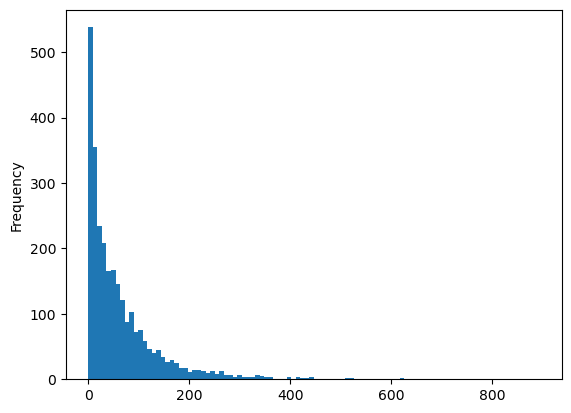

In [18]:
vehicles_bgs['Num_ZeroCarHHs'].plot.hist(bins=100)

Looking at the percentage of zero-free households, we see that the median block group has about 9% zero-vehicle households, but that the number ranges from 0% to 90%.

In [19]:
vehicles_bgs['Pct_ZeroCarHHs'].describe()

count    2778.000000
mean       12.266015
std        12.607610
min         0.000000
25%         2.862500
50%         8.570000
75%        18.150000
max        89.810000
Name: Pct_ZeroCarHHs, dtype: float64

<AxesSubplot: ylabel='Frequency'>

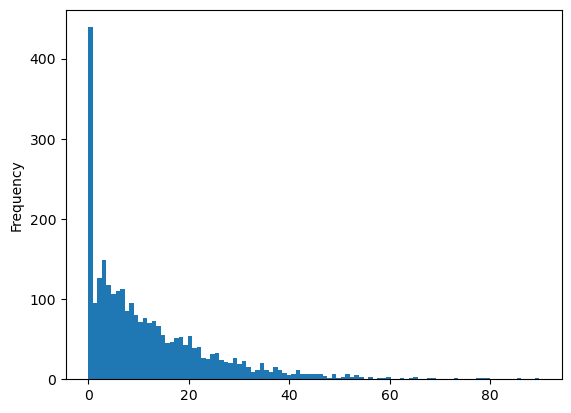

In [20]:
vehicles_bgs['Pct_ZeroCarHHs'].plot.hist(bins=100)

An initial exploratory map of the number of households that do not have a car

<AxesSubplot: >

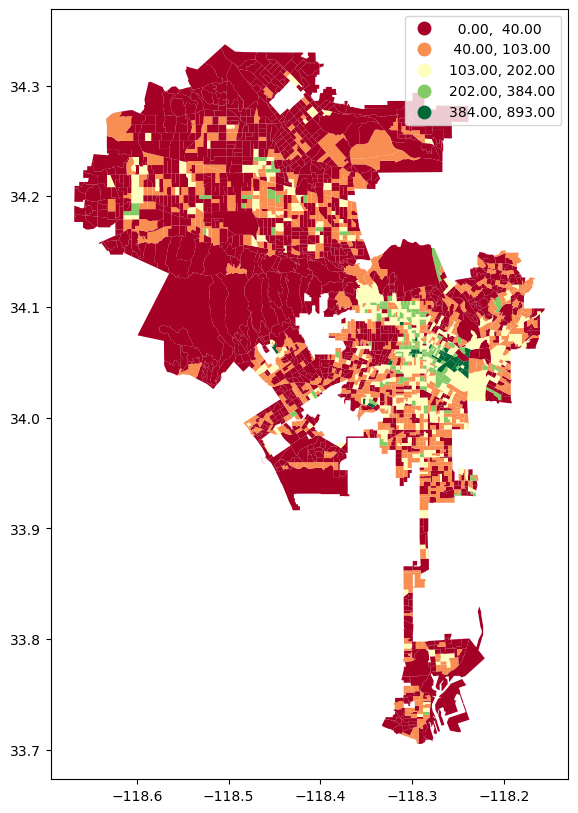

In [21]:
vehicles_bgs.plot(figsize=(12,10),
                 column='Num_ZeroCarHHs',
                 cmap= 'RdYlGn',    
                 legend=True, 
                 scheme='NaturalBreaks')

This second map is by percent instead of number of households. Note that there's "holes" in the map because places with no households at all are not shaded.

<AxesSubplot: >

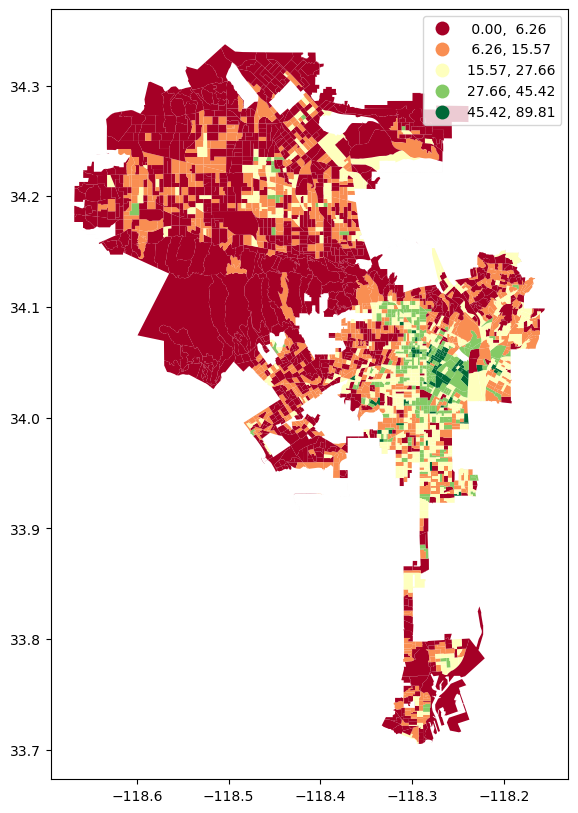

In [22]:
vehicles_bgs.plot(figsize=(12,10),
                 column='Pct_ZeroCarHHs',
                 cmap= 'RdYlGn',    
                 legend=True, 
                 scheme='NaturalBreaks')

These maps are helpful, but if we're interested in where there are the most people without cars, we have to correct for the fact that block groups are different sizes. To do this, I'll create a new "density" variable.

In [23]:
vehicles_bgs['density_zerocar'] = vehicles_bgs['Num_ZeroCarHHs'] / vehicles_bgs['AreaSqMil']
vehicles_bgs

,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,...,FIPS_2010,Geography_Name,Number_HHs,Num_ZeroCarHHs,Pct_ZeroCarHHs,SeniorOwnerNoCar,SeniorOwnerCar,SeniorRenterNoCar,SeniorRenterCar,density_zerocar
0,1944,060372742022,2742022,274202,0.2663,BG 2,44000,44000,Los Angeles,Los Angeles,...,060372742022,"Block Group 2, Census Tract 2742.02, Los Angel...",488,30,6.15,0,41,0,28,112.654900
1,2078,060372742023,2742023,274202,0.0617,BG 3,44000,44000,Los Angeles,Los Angeles,...,060372742023,"Block Group 3, Census Tract 2742.02, Los Angel...",366,0,0.00,0,14,0,0,0.000000
2,2077,060372742021,2742021,274202,0.1093,BG 1,44000,44000,Los Angeles,Los Angeles,...,060372742021,"Block Group 1, Census Tract 2742.02, Los Angel...",982,185,18.84,0,268,153,34,1692.589204
3,2203,060372742024,2742024,274202,0.0429,BG 4,44000,44000,Los Angeles,Los Angeles,...,060372742024,"Block Group 4, Census Tract 2742.02, Los Angel...",323,0,0.00,0,0,0,0,0.000000
4,2834,060377029013,7029013,702901,0.3349,BG 3,45806,99037,Marina del Rey,Unincorporated,...,060377029013,"Block Group 3, Census Tract 7029.01, Los Angel...",1607,50,3.11,0,0,0,189,149.298298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,3766,060371041032,1041032,104103,0.1965,BG 2,44000,44000,Los Angeles,Los Angeles,...,060371041032,"Block Group 2, Census Tract 1041.03, Los Angel...",338,8,2.37,8,89,0,0,40.712468
2790,6203,060371041031,1041031,104103,0.1699,BG 1,44000,44000,Los Angeles,Los Angeles,...,060371041031,"Block Group 1, Census Tract 1041.03, Los Angel...",401,18,4.49,0,34,0,0,105.944673
2791,2389,060371042042,1042042,104204,0.8930,BG 2,44000,44000,Los Angeles,Los Angeles,...,060371042042,"Block Group 2, Census Tract 1042.04, Los Angel...",453,0,0.00,0,38,0,0,0.000000
2792,2097,060371060202,1060202,106020,0.4106,BG 2,44000,44000,Los Angeles,Los Angeles,...,060371060202,"Block Group 2, Census Tract 1060.20, Los Angel...",678,8,1.18,8,115,0,11,19.483682


<AxesSubplot: ylabel='Frequency'>

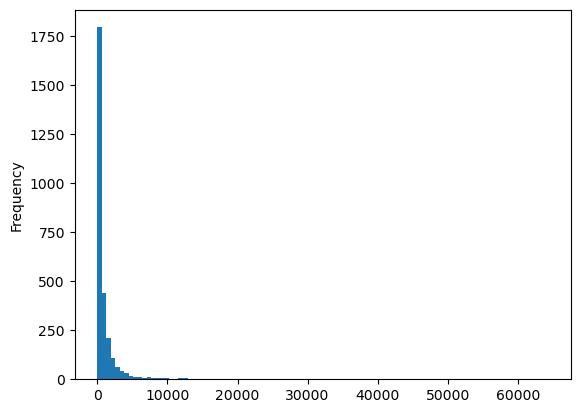

In [24]:
vehicles_bgs['density_zerocar'].plot.hist(bins=100)

<AxesSubplot: >

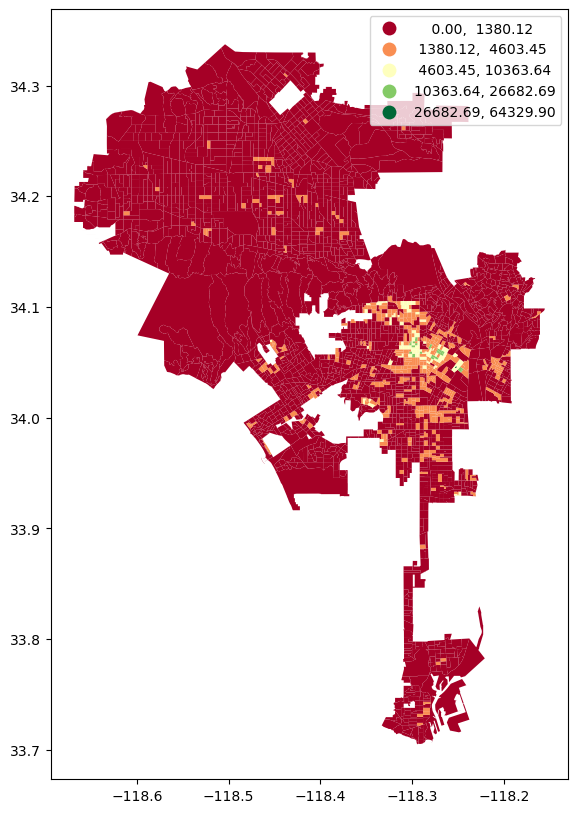

In [25]:
vehicles_bgs.plot(figsize=(12,10),
                 column='density_zerocar',
                 cmap= 'RdYlGn',    
                 legend=True, 
                 scheme='NaturalBreaks')

This is very helpful in one way! It makes it clear that Downtown is really unparalleled in terms of spatial concentrations of zero-vehicle households. However, it doesn't show variation very well, so I'll include a quantile map too. The quantile map helps show that while downtown has the highest density of zero-vehicle households, South LA is a second region of interest, and parts of the Valley and West LA also need consideration.

<AxesSubplot: >

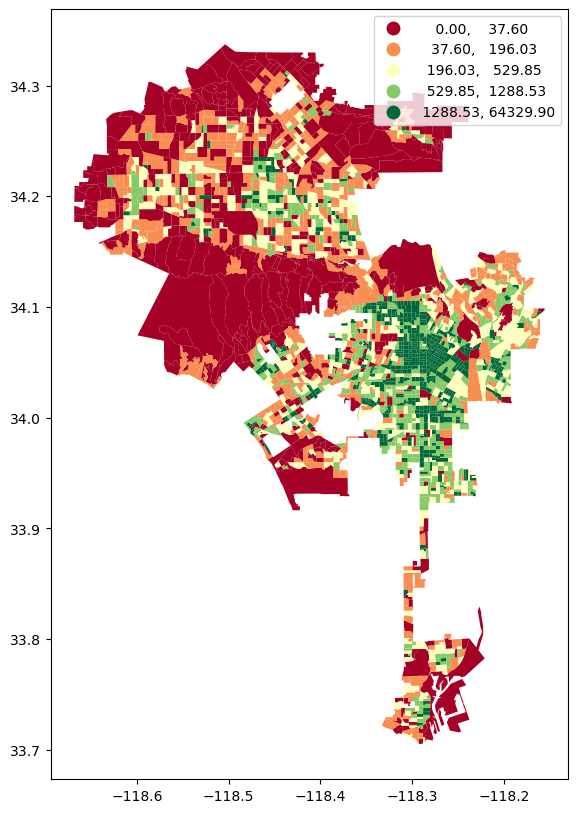

In [26]:
vehicles_bgs.plot(figsize=(12,10),
                 column='density_zerocar',
                 cmap= 'RdYlGn', 
                 legend=True, 
                 scheme='quantiles')

#### Senior-Headed Zero-Vehicle Households in Los Angeles
Now I will turn my attention to creating new variables to understand where there are Seniors (people 65 or older) who do not have a car.
Building on the work from before, I'll focus on:
1) The number of seniors per block group that do not have a car
2) The number of seniors per square mile that do not have a car in each block group

In [27]:
vehicles_bgs['Senior_ZeroCar'] = vehicles_bgs['SeniorOwnerNoCar'] + vehicles_bgs['SeniorRenterNoCar']
vehicles_bgs['density_senior_zerocar'] = vehicles_bgs['Senior_ZeroCar'] / vehicles_bgs['AreaSqMil']
vehicles_bgs

,OBJECTID,GEOID10,CTBG10,CT10,AreaSqMil,LABEL,FIP10,FIP10RV,CDP_NAME,CITYNAME,...,Number_HHs,Num_ZeroCarHHs,Pct_ZeroCarHHs,SeniorOwnerNoCar,SeniorOwnerCar,SeniorRenterNoCar,SeniorRenterCar,density_zerocar,Senior_ZeroCar,density_senior_zerocar
0,1944,060372742022,2742022,274202,0.2663,BG 2,44000,44000,Los Angeles,Los Angeles,...,488,30,6.15,0,41,0,28,112.654900,0,0.000000
1,2078,060372742023,2742023,274202,0.0617,BG 3,44000,44000,Los Angeles,Los Angeles,...,366,0,0.00,0,14,0,0,0.000000,0,0.000000
2,2077,060372742021,2742021,274202,0.1093,BG 1,44000,44000,Los Angeles,Los Angeles,...,982,185,18.84,0,268,153,34,1692.589204,153,1399.817017
3,2203,060372742024,2742024,274202,0.0429,BG 4,44000,44000,Los Angeles,Los Angeles,...,323,0,0.00,0,0,0,0,0.000000,0,0.000000
4,2834,060377029013,7029013,702901,0.3349,BG 3,45806,99037,Marina del Rey,Unincorporated,...,1607,50,3.11,0,0,0,189,149.298298,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,3766,060371041032,1041032,104103,0.1965,BG 2,44000,44000,Los Angeles,Los Angeles,...,338,8,2.37,8,89,0,0,40.712468,8,40.712468
2790,6203,060371041031,1041031,104103,0.1699,BG 1,44000,44000,Los Angeles,Los Angeles,...,401,18,4.49,0,34,0,0,105.944673,0,0.000000
2791,2389,060371042042,1042042,104204,0.8930,BG 2,44000,44000,Los Angeles,Los Angeles,...,453,0,0.00,0,38,0,0,0.000000,0,0.000000
2792,2097,060371060202,1060202,106020,0.4106,BG 2,44000,44000,Los Angeles,Los Angeles,...,678,8,1.18,8,115,0,11,19.483682,8,19.483682


<AxesSubplot: ylabel='Frequency'>

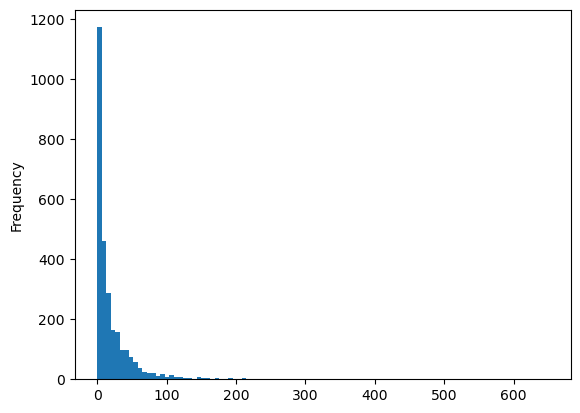

In [28]:
vehicles_bgs['Senior_ZeroCar'].plot.hist(bins=100)

<AxesSubplot: ylabel='Frequency'>

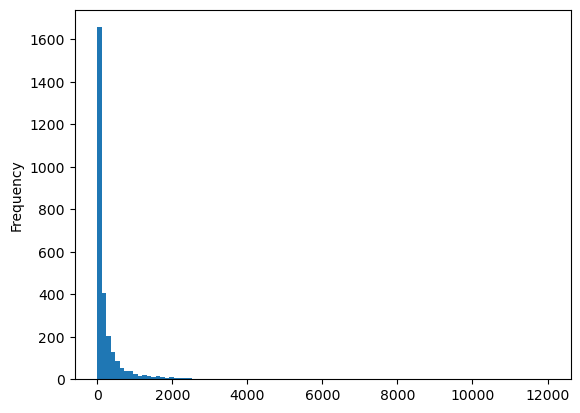

In [29]:
vehicles_bgs['density_senior_zerocar'].plot.hist(bins=100)

<AxesSubplot: >

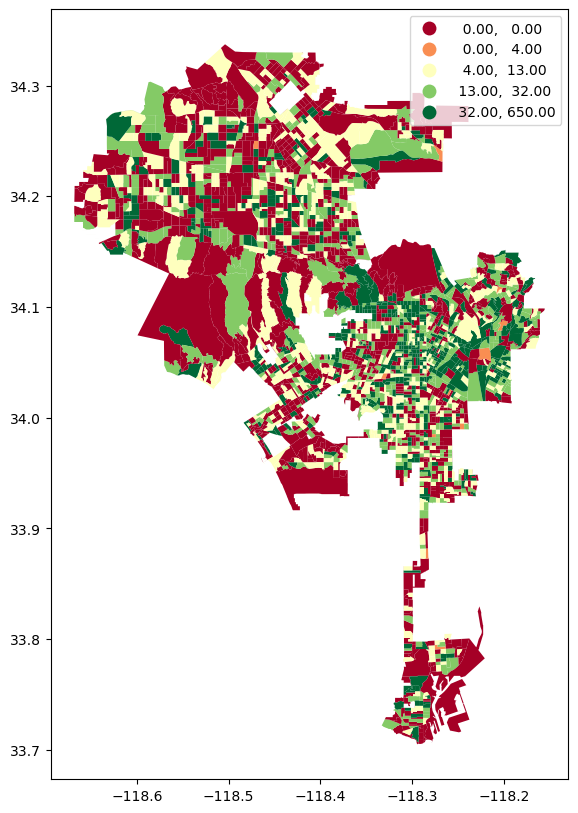

In [30]:
vehicles_bgs.plot(figsize=(12,10),
                 column='Senior_ZeroCar',
                 cmap= 'RdYlGn', 
                 legend=True,
                 scheme='quantiles')

<AxesSubplot: >

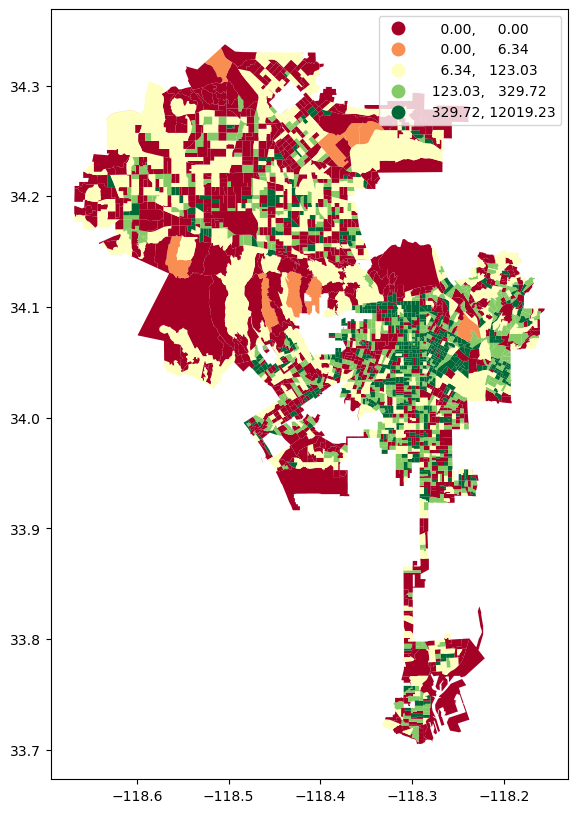

In [31]:
vehicles_bgs.plot(figsize=(12,10),
                 column='density_senior_zerocar',
                 cmap= 'RdYlGn', 
                 legend=True,
                 scheme='quantiles')

The 'density' maps feel more meaningful to me, because many of the block groups with "lots" of car-free seniors in the Northern part of Los Angeles are really just showing up because they're so physically large. For my final piece of analysis, I'm interested in simplifying this map to just show places with a "Below Average" "Average" or "Above Average" concentration of car-free seniors, since this is likely what our analysis will have to use in the end.

In [32]:
vehicles_sorted = vehicles_bgs.sort_values('density_senior_zerocar')
vehicles_sorted = vehicles_sorted.reset_index()

This code will find the cutoffs associated with the minimum, 40th percentile, 60th percentile, and maximum value.

In [33]:
print(vehicles_sorted.loc[0 , 'density_senior_zerocar'])
print(vehicles_sorted.loc[round((.4) * (len(vehicles_sorted)-1)) , 'density_senior_zerocar'])
print(vehicles_sorted.loc[round((.6) * (len(vehicles_sorted)-1)) , 'density_senior_zerocar'])
print(vehicles_sorted.loc[len(vehicles_sorted) - 1 , 'density_senior_zerocar'])

0.0
6.33362362441612
123.07692307692307
12019.23076923077


Since that appears to be working, we'll now use that code to create new variables that assign each census block group to a category based on its percentile.

In [34]:
vehicles_sorted['zero_car_senior_category'] = '3: Above Average Density of Car-Free Senior Households'
vehicles_sorted.loc[vehicles_sorted['density_senior_zerocar'] < 
                    (vehicles_sorted.loc[round((.6) * (len(vehicles_sorted)-1)) , 'density_senior_zerocar']), 'zero_car_senior_category'] = '2: Average Density of Car-Free Senior Households'
vehicles_sorted.loc[vehicles_sorted['density_senior_zerocar'] < 
                    (vehicles_sorted.loc[round((.4) * (len(vehicles_sorted)-1)) , 'density_senior_zerocar']) , 'zero_car_senior_category'] = '1: Below Average Density of Car-Free Senior Households'

And now a final map which categorizes all areas based on the number of senior-headed households without a car per square mile!

<AxesSubplot: >

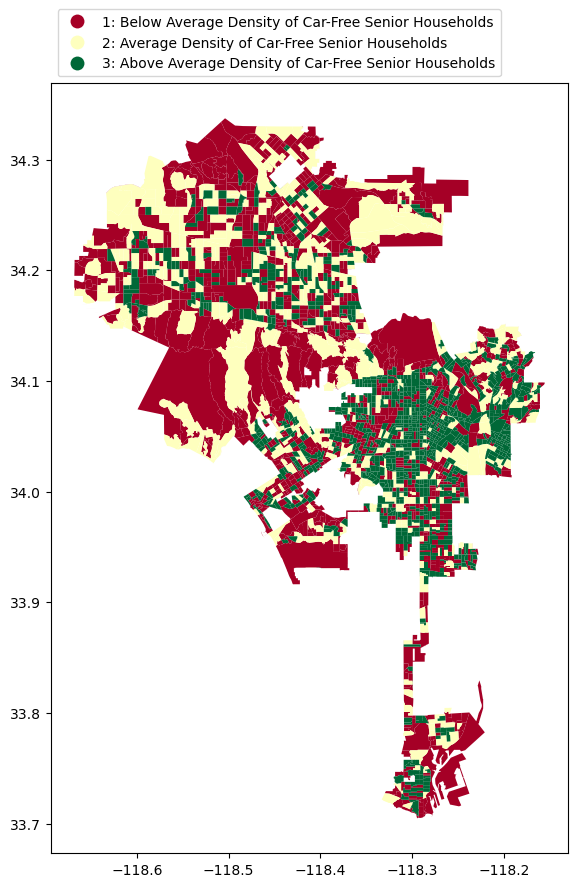

In [35]:
vehicles_sorted.plot(
            figsize=(12,10),   
            column = 'zero_car_senior_category',
            cmap= 'RdYlGn', 
            legend = True,
            legend_kwds={
               'loc': 'lower left',
               'bbox_to_anchor':(0,1)
            }
) 